In [22]:
import pandas as pd

# Path to your unzipped file
data_path = "../data/yelp_academic_dataset_business.json"

# Read JSON file line-by-line
df = pd.read_json(data_path, lines=True)

# Filter to only restaurants (using 'categories' text)
df = df[df['categories'].str.contains("Restaurant", na=False)]

print("Total restaurants:", len(df))
df.head(3)


Total restaurants: 52286


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None


In [14]:
import pandas as pd

# --- 1. Load check-in dataset ---
checkin_df = pd.read_json("../data/yelp_academic_dataset_checkin.json", lines=True)

# Compute number of check-ins per business
checkin_df['checkin_count'] = checkin_df['date'].apply(
    lambda x: len(x.split(', ')) if isinstance(x, str) else 0
)
checkin_df = checkin_df[['business_id', 'checkin_count']]

# --- 2. Load tip dataset ---
tip_df = pd.read_json("../data/yelp_academic_dataset_tip.json", lines=True)

# Aggregate tip-level metrics per business
tip_summary = (
    tip_df.groupby('business_id')
    .agg(
        tip_count=('text', 'count'),
        avg_compliments=('compliment_count', 'mean')
    )
    .reset_index()
)

# --- 3. Merge all datasets ---
merged = (
    df.merge(checkin_df, on='business_id', how='left')
      .merge(tip_summary, on='business_id', how='left')
)

# --- 4. Clean up missing values ---
merged['checkin_count'] = merged['checkin_count'].fillna(0).astype(int)
merged['tip_count'] = merged['tip_count'].fillna(0).astype(int)
merged['avg_compliments'] = merged['avg_compliments'].fillna(0)

print("Final merged shape:", merged.shape)
merged.head(3)


Final merged shape: (52286, 17)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,checkin_count,tip_count,avg_compliments
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",335,10,0.0
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",22,2,0.0
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None,40,8,0.0


In [18]:
philly = merged[merged['city'] == 'Philadelphia']


In [32]:
philly.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'checkin_count', 'tip_count',
       'avg_compliments'],
      dtype='object')

In [37]:
import pandas as pd

income = pd.read_csv('../data/income-zip.csv')
income = income.rename(columns={
    'ZIP': 'zip',
    'Households - Median income (dollars)': 'median_income',
    'Households - Mean income (dollars)': 'mean_income',
    'Total population': 'population'
})
income['zip'] = income['zip'].astype(str).str.zfill(5)
income = income.dropna(subset=['median_income'])
income.head()


,zip,Town,State Abbreviation,State,Metro,Primary County,population,median_income,Families - Median income (dollars),Married-couple families - Median income (dollars),...,"Nonfamily households - Less than $10,000","Nonfamily households - $10,000 to $14,999","Nonfamily households - $15,000 to $24,999","Nonfamily households - $25,000 to $34,999","Nonfamily households - $35,000 to $49,999","Nonfamily households - $50,000 to $74,999","Nonfamily households - $75,000 to $99,999","Nonfamily households - $100,000 to $149,999","Nonfamily households - $150,000 to $199,999","Nonfamily households - $200,000 or more"
0,35004,Moody,AL,Alabama,"Birmingham, AL",St. Clair County,11558,85344.0,107839.0,120802.0,...,11.6,3.0,10.6,14.9,6.7,16.1,26.3,10.3,0.0,0.5
1,35005,Adamsville,AL,Alabama,"Birmingham, AL",Jefferson County,8143,57151.0,63100.0,64723.0,...,2.8,16.9,16.8,11.3,12.2,13.4,10.2,11.1,5.3,0.0
2,35006,Adger,AL,Alabama,"Birmingham, AL",Jefferson County,3599,65068.0,68056.0,75208.0,...,12.7,7.1,3.2,26.6,6.2,35.4,2.6,6.2,0.0,0.0
3,35007,Alabaster,AL,Alabama,"Birmingham, AL",Shelby County,27935,86994.0,101367.0,109016.0,...,11.5,2.3,9.8,8.0,17.6,27.5,7.4,9.1,0.6,6.2
4,35010,Alexander City,AL,Alabama,"Alexander City, AL",Tallapoosa County,19619,48744.0,68091.0,86399.0,...,12.7,6.4,26.3,21.0,10.7,14.3,1.7,2.8,1.4,2.9


In [35]:
income.head()

,ZIP,Town,State Abbreviation,State,Metro,Primary County,Total population,Households - Median income (dollars),Families - Median income (dollars),Married-couple families - Median income (dollars),...,"Nonfamily households - Less than $10,000","Nonfamily households - $10,000 to $14,999","Nonfamily households - $15,000 to $24,999","Nonfamily households - $25,000 to $34,999","Nonfamily households - $35,000 to $49,999","Nonfamily households - $50,000 to $74,999","Nonfamily households - $75,000 to $99,999","Nonfamily households - $100,000 to $149,999","Nonfamily households - $150,000 to $199,999","Nonfamily households - $200,000 or more"
0,35004,Moody,AL,Alabama,"Birmingham, AL",St. Clair County,11558,85344.0,107839.0,120802.0,...,11.6,3.0,10.6,14.9,6.7,16.1,26.3,10.3,0.0,0.5
1,35005,Adamsville,AL,Alabama,"Birmingham, AL",Jefferson County,8143,57151.0,63100.0,64723.0,...,2.8,16.9,16.8,11.3,12.2,13.4,10.2,11.1,5.3,0.0
2,35006,Adger,AL,Alabama,"Birmingham, AL",Jefferson County,3599,65068.0,68056.0,75208.0,...,12.7,7.1,3.2,26.6,6.2,35.4,2.6,6.2,0.0,0.0
3,35007,Alabaster,AL,Alabama,"Birmingham, AL",Shelby County,27935,86994.0,101367.0,109016.0,...,11.5,2.3,9.8,8.0,17.6,27.5,7.4,9.1,0.6,6.2
4,35010,Alexander City,AL,Alabama,"Alexander City, AL",Tallapoosa County,19619,48744.0,68091.0,86399.0,...,12.7,6.4,26.3,21.0,10.7,14.3,1.7,2.8,1.4,2.9


In [38]:
merged['postal_code'] = merged['postal_code'].astype(str).str.zfill(5)

new_merged = merged.merge(income, left_on='postal_code', right_on='zip', how='left')


In [39]:
new_merged.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,"Nonfamily households - Less than $10,000","Nonfamily households - $10,000 to $14,999","Nonfamily households - $15,000 to $24,999","Nonfamily households - $25,000 to $34,999","Nonfamily households - $35,000 to $49,999","Nonfamily households - $50,000 to $74,999","Nonfamily households - $75,000 to $99,999","Nonfamily households - $100,000 to $149,999","Nonfamily households - $150,000 to $199,999","Nonfamily households - $200,000 or more"
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,12.8,5.1,6.9,7.6,7.6,17.9,11.8,15.9,5.2,9.1
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,6.9,5.2,29.1,5.1,19.1,10.9,6.8,11.0,4.1,1.7
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,6.4,4.4,9.8,11.4,19.5,21.0,13.5,7.7,2.8,3.3
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,9.6,6.5,8.8,7.2,10.4,25.0,13.4,10.2,4.4,4.4
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,12.4,8.8,4.0,4.6,6.2,13.9,7.8,17.3,10.3,14.7


In [40]:
new_merged.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'checkin_count', 'tip_count',
       'avg_compliments', 'zip', 'Town', 'State Abbreviation', 'State',
       'Metro', 'Primary County', 'population', 'median_income',
       'Families - Median income (dollars)',
       'Married-couple families - Median income (dollars)',
       'Nonfamily households - Median income (dollars)', 'mean_income',
       'Families - Mean income (dollars)',
       'Married-couple families - Mean income (dollars)',
       'Nonfamily households - Mean income (dollars)', 'Households - Total',
       'Households - Less than $10,000', 'Households - $10,000 to $14,999',
       'Households - $15,000 to $24,999', 'Households - $25,000 to $34,999',
       'Households - $35,000 to $49,999', 'Households - $50,000 to $74,999',
       'Households - $75,000 to $99,999', 'Households - $100,00

In [41]:
# Make all city names lowercase for consistency
new_merged['city'] = new_merged['city'].astype(str).str.lower()

# Keep only Philadelphia
philly = new_merged[(new_merged['city'] == 'philadelphia') | (new_merged['postal_code'].str.startswith('19'))]


In [42]:
philly.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,"Nonfamily households - Less than $10,000","Nonfamily households - $10,000 to $14,999","Nonfamily households - $15,000 to $24,999","Nonfamily households - $25,000 to $34,999","Nonfamily households - $35,000 to $49,999","Nonfamily households - $50,000 to $74,999","Nonfamily households - $75,000 to $99,999","Nonfamily households - $100,000 to $149,999","Nonfamily households - $150,000 to $199,999","Nonfamily households - $200,000 or more"
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,12.8,5.1,6.9,7.6,7.6,17.9,11.8,15.9,5.2,9.1
7,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,2.2,2.7,2.4,4.2,4.2,9.7,19.6,18.7,12.0,24.4
8,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,philadelphia,PA,19147,39.943223,-75.162568,4.5,205,...,4.3,4.4,7.6,8.4,6.9,17.6,13.0,18.0,8.7,11.0
14,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,philadelphia,PA,19147,39.939825,-75.157447,4.0,65,...,4.3,4.4,7.6,8.4,6.9,17.6,13.0,18.0,8.7,11.0
16,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,philadelphia,PA,19127,40.022466,-75.218314,3.0,41,...,9.3,0.0,5.0,7.3,9.7,13.5,14.1,14.9,16.4,9.6


In [43]:
philly.shape

(12642, 76)

In [47]:
philly = philly[philly['city'] == 'philadelphia']


In [48]:
philly['postal_code'].nunique()

57

In [61]:
philly['median_income'] = philly['median_income'].fillna(philly['median_income'].median())

In [50]:
import geopandas as gpd
geo = gpd.read_file("../data/zipcodes_poly.geojson")
geo.head()

,OBJECTID,CODE,COD,Shape__Area,Shape__Length,geometry
0,1,19120,20,1.456207e+07,19887.714114,"POLYGON ((-75.11107 40.04682, -75.10943 40.045..."
1,2,19121,21,1.102598e+07,15728.621590,"POLYGON ((-75.19227 39.99463, -75.19205 39.994..."
2,3,19122,22,5.689181e+06,9599.539345,"POLYGON ((-75.15406 39.98601, -75.15328 39.985..."
3,4,19123,23,5.676639e+06,10507.471601,"POLYGON ((-75.1519 39.97056, -75.1515 39.97054..."
4,5,19124,24,2.296476e+07,25346.674261,"POLYGON ((-75.0966 40.04249, -75.09281 40.0391..."


In [59]:
merged_geo = geo.merge(philly, left_on='CODE', right_on='postal_code', how='left')
merged_geo.shape


(5806, 82)

(np.float64(-75.29653466356935),
 np.float64(-74.93952065285654),
 np.float64(39.853948713668416),
 np.float64(40.15145798905888))

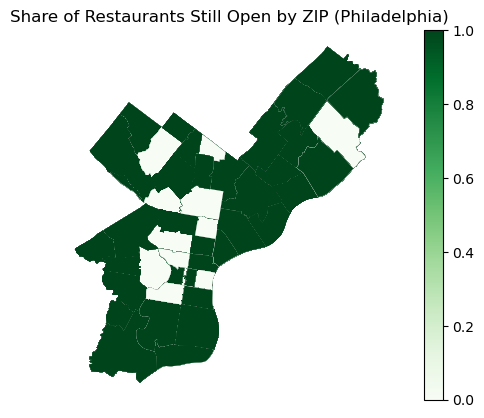

In [62]:
merged_geo.plot(column='is_open', cmap='Greens', legend=True)
plt.title("Share of Restaurants Still Open by ZIP (Philadelphia)")
plt.axis('off')

In [52]:
zip_summary = philly.groupby('postal_code').agg({
    'stars': 'mean',
    'review_count': 'mean',
    'checkin_count': 'mean',
    'tip_count': 'mean',
    'avg_compliments': 'mean',
    'is_open': 'mean',
    'median_income': 'mean'
}).reset_index()
zip_summary


,postal_code,stars,review_count,checkin_count,tip_count,avg_compliments,is_open,median_income
0,00000,4.000000,22.000000,31.000000,0.000000,0.000000,0.000000,NaN
1,19019,4.000000,13.000000,5.000000,1.000000,0.000000,1.000000,NaN
2,19087,3.500000,15.000000,6.000000,2.000000,0.000000,1.000000,165451.0
3,19092,3.500000,8.000000,7.000000,1.000000,0.000000,1.000000,NaN
4,19101,3.500000,13.000000,92.000000,6.000000,0.000000,1.000000,NaN
5,19102,3.417085,177.909548,318.944724,20.226131,0.008511,0.527638,114844.0
6,19103,3.658004,175.274428,336.018711,19.887734,0.011071,0.498960,97940.0
7,19104,3.510638,93.094563,178.685579,12.047281,0.014434,0.583924,39526.0
8,19106,3.614618,180.578073,329.033223,20.807309,0.012909,0.461794,129779.0
9,19107,3.669492,210.349153,447.559322,26.038983,0.012802,0.547458,70382.0
